# Generating visualizations


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from implementations import *
from utils.helpers import *
from utils.prediction import *
from utils.preprocess import *
from utils.cross_validation import *

In [2]:
TRAIN_PATH = "./data/train.csv"
TEST_PATH = "./data/test.csv"

## distribution plots of raw figs.

In [3]:
y_raw_tr, tx_raw_tr, ids_tr = load_csv_data(TRAIN_PATH)
_, tx_raw_te, ids_te = load_csv_data(TEST_PATH)

y_tr = process_y(y_raw_tr)
tx_tr = tx_raw_tr
tx_te = tx_raw_te

tx_tr[:, [22, 29]] = tx_tr[:, [29, 22]]
tx_te[:, [22, 29]] = tx_te[:, [29, 22]]
tx_tr[tx_tr[:, 0] == -999, 0] = np.nan
tx_te[tx_te[:, 0] == -999, 0] = np.nan

median = np.nanmedian(np.hstack((tx_tr[:, 0], tx_te[:, 0])))
tx_tr[np.isnan(tx_tr[:, 0]), 0] = median
tx_te[np.isnan(tx_te[:, 0]), 0] = median


# split datasets to different jet nums
# and remove columns with missing values for each jet num
tx_train_list, y_tr_list = split_jet_num(tx_tr, y_tr)

# remove outliers
means = []
stds = []
tx_train_list_clipped = []
for i in range(3):
    mean = np.mean(tx_train_list[i], axis=0)
    std = np.std(tx_train_list[i], axis=0)
    tx_train_list_clipped.append( np.clip(tx_train_list[i], mean - 2 * std, mean + 2 * std))
    means.append(mean)
    stds.append(std)



In [23]:
for i in range(3):
    print(tx_train_list[i].shape)

(99913, 18)
(77544, 22)
(72543, 29)


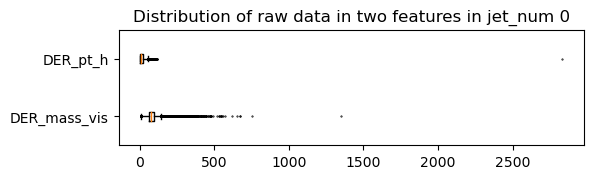

In [24]:
plt.figure(figsize=(6,1.5)) 
flierprops = dict(marker = '.', color = 'green', markersize =1)
plt.boxplot(tx_train_list[0][:, 2:4], vert=False, flierprops=flierprops, labels =['DER_mass_vis', 'DER_pt_h'])
plt.title('Distribution of raw data in two features in jet_num 0')
plt.show()